<a href="https://colab.research.google.com/github/AnjanStha/PRT551_Machine_learning_Assig4_Update_grpPresn/blob/main/loan_approval_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

S225 PRT565 MACHINE LEARNING , ARTIFICIAL INTELLIGENCE AND ALGORITHMS

Sydney Group (3)

Assignment 4

Title : Loan Approval Prediction Using Machine Learning

Student Name (ID):

Nikan Khadka (S388699)

Parshuram sapkota (S388961)

Anjan Shrestha (S389022)

Lecturer: Dr. Reem Sherif

In [ ]:

import pandas as pd
df = pd.read_csv('loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning model/algorithm to be used for prediction and analysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV


Checking initial rows to understand features and target variables


In [ ]:
#print only the head of the data set shows top layer of data
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
# Dataset info
df.info()

# data set summary
df.describe()

print("\nMissing values:")
print(df.isnull().sum()) # provides total count of missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB

Missing values

data set information such as null values and value count along with plotting the loan approval and rejection ratios

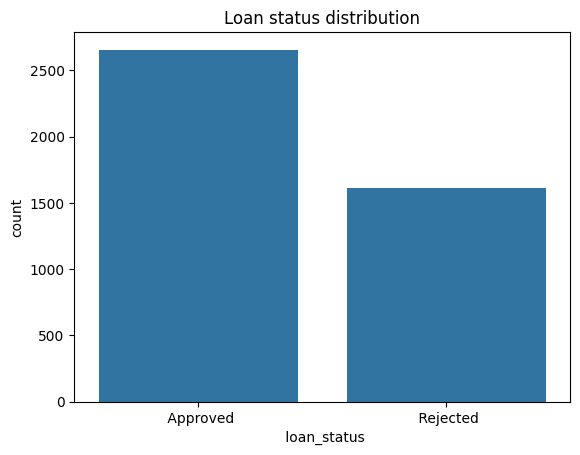

In [ ]:
# Checking target distribution
sns.countplot(x=' loan_status', data=df)
plt.title("Loan status distribution")
plt.show()


Data preprocessing

In [ ]:
## Data Preprocessing
## check for any duplicate vaules in dataset
print(f'There are {df.duplicated().sum()} duplicate rows in dataset.')

There are 0 duplicate rows in dataset.


In [ ]:
## checking for any messing  value data set
print(df.isna().sum())

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


In [ ]:
# Drop loan_id column since it does not contribute much for loan prediction
df_cleaned = df.drop(columns=['loan_id'])

# check for null or  missing values
df_cleaned.isnull().sum()


,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0
luxury_assets_value,0


In [ ]:
# Convert categorical columns value to numeric using simple label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_cleaned[' education'] = le.fit_transform(df_cleaned[' education'])  # graduate=1, not nraduate=0
df_cleaned[' self_employed'] = le.fit_transform(df_cleaned[' self_employed'])  # yes=1, no=0
df_cleaned[' loan_status'] = le.fit_transform(df_cleaned[' loan_status'])  # approved=1, rejected=0

# Verify changes
df_cleaned.head()


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


Exploratory Data Analysis (EDA) with Visualizations

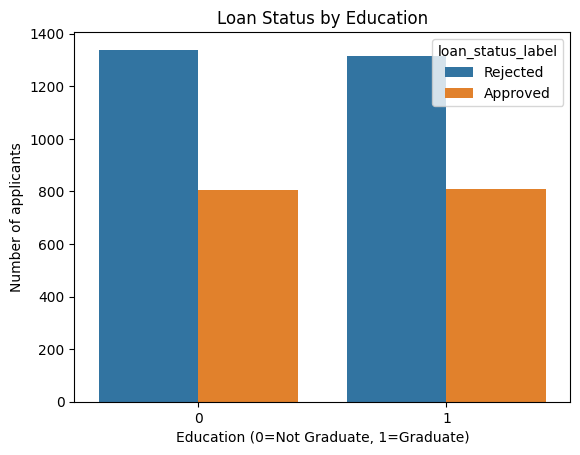

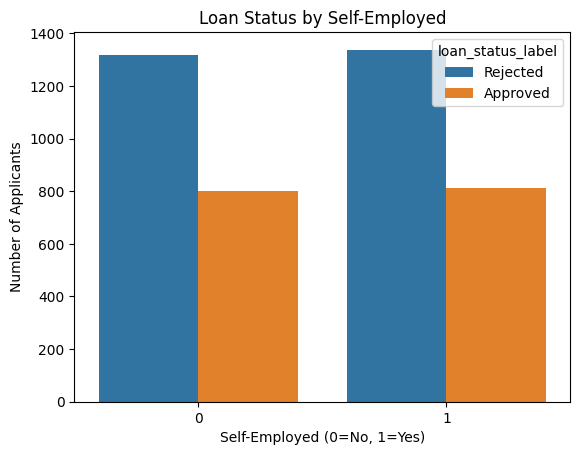

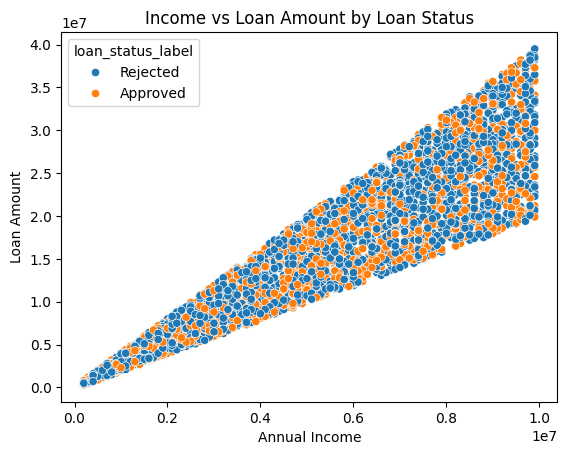

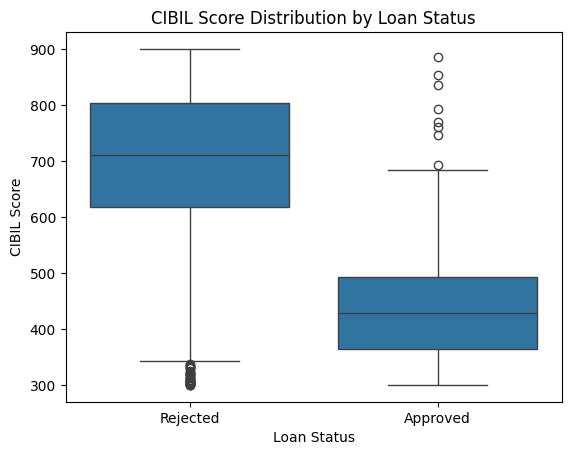

In [ ]:
# mapping 0 and 1  to readable loan status labels for hue
df_cleaned['loan_status_label'] = df_cleaned[' loan_status'].map({0: 'Rejected', 1: 'Approved'})

#education vs loan status
sns.countplot(x=' education', hue='loan_status_label', data=df_cleaned)
plt.title("Loan Status by Education")
plt.xlabel("Education (0=Not Graduate, 1=Graduate)")
plt.ylabel("Number of applicants")
plt.show()

# self employed vs loan status
sns.countplot(x=' self_employed', hue='loan_status_label', data=df_cleaned)
plt.title("Loan Status by Self-Employed")
plt.xlabel("Self-Employed (0=No, 1=Yes)")
plt.ylabel("Number of Applicants")
plt.show()

#income vs loan Amount by Loan Status
sns.scatterplot(x=' income_annum', y=' loan_amount', hue='loan_status_label', data=df_cleaned)
plt.title("Income vs Loan Amount by Loan Status")
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount")
plt.show()

#boxplot for CIBIL Score vs Loan Status
sns.boxplot(x='loan_status_label', y=' cibil_score', data=df_cleaned)
plt.title("CIBIL Score Distribution by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("CIBIL Score")
plt.show()




In [ ]:
#drop loan status label since it was only used for the plotting and making the figure easier to understand
df_cleaned = df_cleaned.drop(columns=['loan_status_label'],axis=1)

#verify the removal
df_cleaned.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


Higher cibil scores tend have loan rejected with some outliers

Model training and accuracy prediction

In [ ]:
# Separate features x and target y
X = df_cleaned.drop(columns=[' loan_status'],axis=1)
y = df_cleaned[' loan_status']

# Quick check
X.head()
y.head()


,loan_status
0,0
1,1
2,1
3,1
4,1


In [ ]:
#split the train and test data
from sklearn.model_selection import train_test_split

# splitting dataset into 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check shapes
X_train.shape, X_test.shape


((2988, 11), (1281, 11))

In [ ]:
#feature scalling
from sklearn.preprocessing import StandardScaler

# Scale numeric features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Scaling helps in normalization of data, helps to keep the data within certain range so that the bigger values donot dominate or affect the accuracy of model.
In models used below it helps in balance and make the model performance better and smoother because of gradient descent converging faster.

Build and evaluate different models

In [ ]:
#Logistic regression accuracy and model output

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("accuration of logistic regression:",accuracy_lr )
print(classification_report(y_test, y_pred_lr))


accuration of logistic regression: 0.9032006245120999
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       810
           1       0.87      0.87      0.87       471

    accuracy                           0.90      1281
   macro avg       0.90      0.90      0.90      1281
weighted avg       0.90      0.90      0.90      1281





I used Logistic Regression to predict whether a loan would be approved or rejected based on features like income, CIBIL score, assets, and employment. The model achieved an **accuracy of 90.3%**, meaning it correctly predicted about 9 out of 10 cases. For rejected loans, the model had a **precision and recall of 0.92**, so it identified most rejected applications correctly. For approved loans, the **precision and recall were 0.87**, showing slightly lower but still good performance. Overall, the model works well and is reliable for predicting loan outcomes. It is slightly better at detecting rejected loans than approved loans.


In [ ]:
#Accuracy of Decision tree  and model output
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("accuration of logistic regression:",accuracy_dt )
print(classification_report(y_test, y_pred_dt))


accuration of logistic regression: 0.9789227166276346
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       810
           1       0.98      0.96      0.97       471

    accuracy                           0.98      1281
   macro avg       0.98      0.98      0.98      1281
weighted avg       0.98      0.98      0.98      1281




I used a Decision Tree model to predict loan approval based on features like income, CIBIL score, assets, and employment. The model achieved a **high accuracy of 97.9%**, meaning it correctly predicted almost all cases. For rejected loans, the **precision and recall were 0.98 and 0.99**, showing it identifies rejected applications very well. For approved loans, the precision and recall were **0.98 and 0.96**, which is also excellent. The F1-scores for both classes are high, indicating good balance between precision and recall. Overall, the Decision Tree performs very well and is more accurate than the Logistic Regression model for predicting loan outcomes.




In [ ]:
#Accuracy of random forest clasifier  and model output

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("accuration of logistic regression:",accuracy_rf )
print(classification_report(y_test, y_pred_rf))


accuration of logistic regression: 0.9797033567525371
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       810
           1       0.98      0.96      0.97       471

    accuracy                           0.98      1281
   macro avg       0.98      0.98      0.98      1281
weighted avg       0.98      0.98      0.98      1281




I used a Random Forest model to predict loan approval based on features like income, CIBIL score, assets, and employment. The model achieved a **high accuracy of 97.97%**, meaning it correctly predicted almost all cases. For rejected loans, the **precision and recall were 0.98 and 0.99**, showing it identifies rejected applications very well. For approved loans, the precision and recall were **0.98 and 0.96**, which is also excellent. The F1-scores are high for both classes, indicating a good balance between precision and recall. Overall, Random Forest performs very well and is slightly more reliable than Logistic Regression.



Naïve Bayes Performance:
Accuracy: 0.9329, Precision: 0.8858, Recall: 0.9384, F1: 0.9113
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       810
           1       0.89      0.94      0.91       471

    accuracy                           0.93      1281
   macro avg       0.92      0.93      0.93      1281
weighted avg       0.93      0.93      0.93      1281



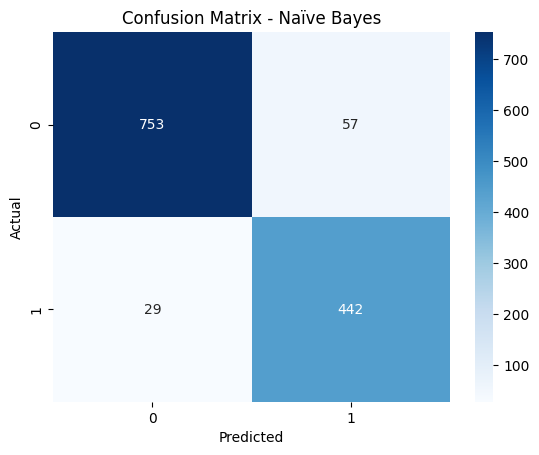

In [ ]:
# Naïve Bayes Classifier
# ---------------------------
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Initialize and train model
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

# Predictions
y_pred_nb = nb.predict(X_test_scaled)
y_prob_nb = nb.predict_proba(X_test_scaled)[:,1]  # probability for ROC

# Evaluation
acc_nb = accuracy_score(y_test, y_pred_nb)
prec_nb = precision_score(y_test, y_pred_nb)
rec_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

accuracy_nb = accuracy_score(y_test, y_pred_nb)

print("Naïve Bayes Performance:")
print(f"Accuracy: {acc_nb:.4f}, Precision: {prec_nb:.4f}, Recall: {rec_nb:.4f}, F1: {f1_nb:.4f}")
print(classification_report(y_test, y_pred_nb))

# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Naïve Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
#Accuracy of XGB classifer  and model output

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("accuration of logistic regression:",accuracy_xgb )
print(classification_report(y_test, y_pred_xgb))


accuration of logistic regression: 0.9750195160031225
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       810
           1       0.97      0.96      0.97       471

    accuracy                           0.98      1281
   macro avg       0.97      0.97      0.97      1281
weighted avg       0.97      0.98      0.97      1281



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [02:06:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



I used an XGBoost model to predict loan approval based on features like income, CIBIL score, assets, and employment. The model achieved a **high accuracy of 97.5%**,it correctly predicted almost all cases. For rejected loans, the **precision and recall were both 0.98**, it identifies rejected applications very well. For approved loans, the precision and recall were **0.97 and 0.96**, which is also very good.
The F1-scores are high for both classes, indicating a good balance between precision and recall. Overall, XGBoost performs very well and is slightly less accurate than Random Forest but still highly reliable for predicting loan outcomes.


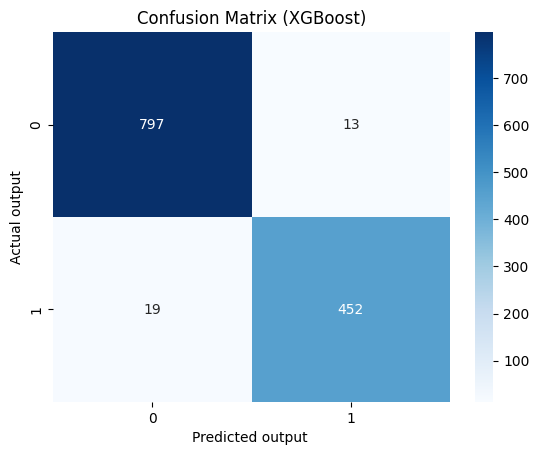

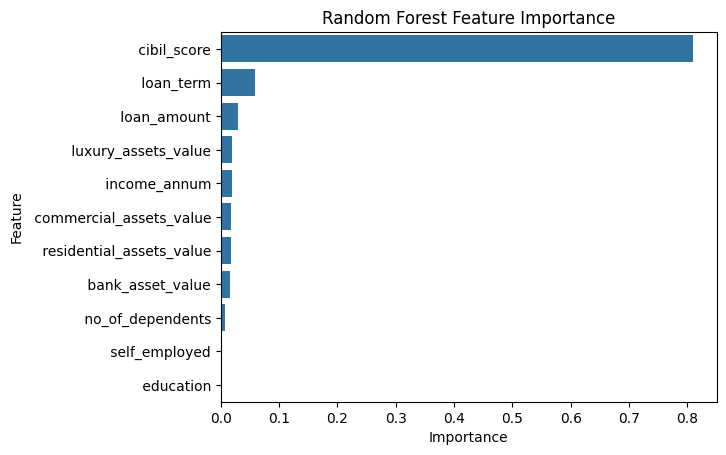

In [ ]:
# Confusion Matrix for XGBoost
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted output ")
plt.ylabel("Actual output")
plt.title("Confusion Matrix (XGBoost)")
plt.show()

# Feature importance visualization from Random Forest
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Random Forest Feature Importance")
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Artificial Neural Network Performance:
Accuracy: 0.9610, Precision: 0.9527, Recall: 0.9406, F1: 0.9466
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       810
           1       0.95      0.94      0.95       471

    accuracy                           0.96      1281
   macro avg       0.96      0.96      0.96      1281
weighted avg       0.96      0.96      0.96      1281



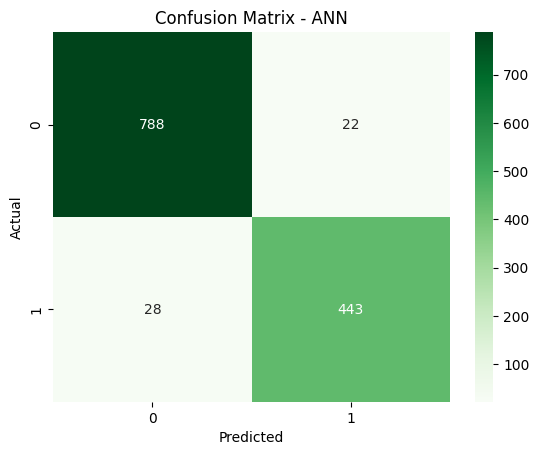

In [ ]:
# ANN using scikit-learn MLPClassifier
from sklearn.neural_network import MLPClassifier

# Build ANN with two hidden layers
ann = MLPClassifier(hidden_layer_sizes=(64,32), activation='relu', solver='adam', max_iter=300, random_state=42)
ann.fit(X_train_scaled, y_train)

# Predictions
y_pred_ann = ann.predict(X_test_scaled)
y_prob_ann = ann.predict_proba(X_test_scaled)[:,1]

# Evaluation
acc_ann = accuracy_score(y_test, y_pred_ann)
prec_ann = precision_score(y_test, y_pred_ann)
rec_ann = recall_score(y_test, y_pred_ann)
f1_ann = f1_score(y_test, y_pred_ann)

accuracy_ann = accuracy_score(y_test, y_pred_ann)

print("Artificial Neural Network Performance:")
print(f"Accuracy: {acc_ann:.4f}, Precision: {prec_ann:.4f}, Recall: {rec_ann:.4f}, F1: {f1_ann:.4f}")
print(classification_report(y_test, y_pred_ann))

# Confusion Matrix
cm_ann = confusion_matrix(y_test, y_pred_ann)
sns.heatmap(cm_ann, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - ANN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5170 - loss: 0.7336
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8200 - loss: 0.5064
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9011 - loss: 0.3724
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9167 - loss: 0.2955
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9210 - loss: 0.2604
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9175 - loss: 0.2315
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9305 - loss: 0.1998
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9275 - loss: 0.2083
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9366 - loss: 0.1832
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9375 - loss: 0.1814
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9383 - loss: 0.1886
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9336 - loss: 0.1824


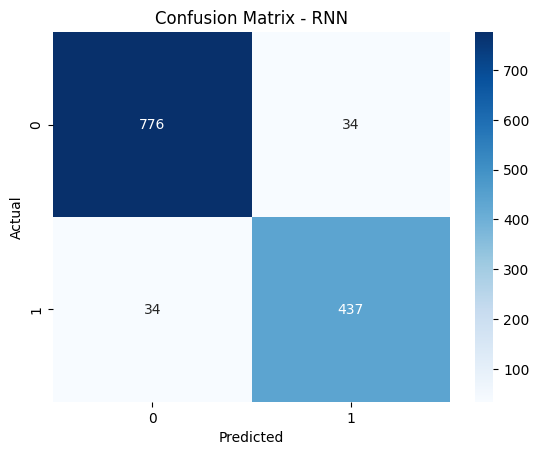

In [ ]:

# RNN and LSTM using Keras (TensorFlow)

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure your data is in 3D shape for RNN/LSTM: (samples, timesteps, features)

X_train_rnn = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_rnn = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


#Simple RNN

rnn_model = Sequential()
rnn_model.add(SimpleRNN(32, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
rnn_model.add(Dense(1, activation='sigmoid'))  # Binary classification

rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn_model.fit(X_train_rnn, y_train, epochs=50, batch_size=32, verbose=1)

# Predictions
y_pred_rnn_prob = rnn_model.predict(X_test_rnn).ravel()
y_pred_rnn = (y_pred_rnn_prob > 0.5).astype(int)

accuracy_rnn = accuracy_score(y_test, y_pred_rnn)

# Evaluation
print("RNN Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rnn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rnn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rnn):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rnn):.4f}")
print(classification_report(y_test, y_pred_rnn))

cm_rnn = confusion_matrix(y_test, y_pred_rnn)
sns.heatmap(cm_rnn, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - RNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6695 - loss: 0.6574
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8360 - loss: 0.5322
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8980 - loss: 0.4091
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9204 - loss: 0.3176
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9252 - loss: 0.2538
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9230 - loss: 0.2317
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9369 - loss: 0.1982
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9350 - loss: 0.1938
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9445 - loss: 0.1731
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9477 - loss: 0.1749
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9445 - loss: 0.1722
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9441 - loss: 0.1530


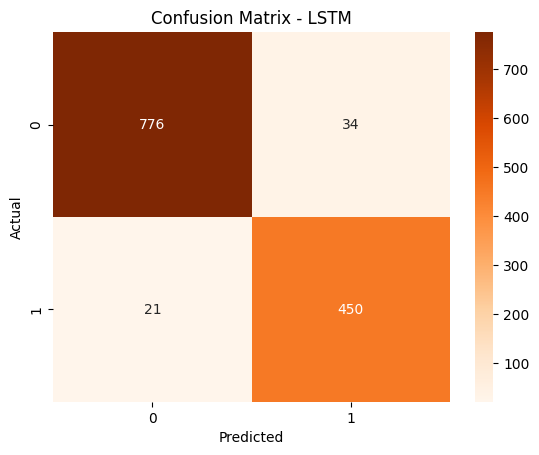

In [ ]:

#LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(32, activation='tanh', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_rnn, y_train, epochs=50, batch_size=32, verbose=1)

# Predictions
y_pred_lstm_prob = lstm_model.predict(X_test_rnn).ravel()
y_pred_lstm = (y_pred_lstm_prob > 0.5).astype(int)

accuracy_lstm = accuracy_score(y_test, y_pred_lstm)

# Evaluation
print("LSTM Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lstm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lstm):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lstm):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lstm):.4f}")
print(classification_report(y_test, y_pred_lstm))

cm_lstm = confusion_matrix(y_test, y_pred_lstm)
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - LSTM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Artificial Neural Networks mimic how human neurons process information. They are powerful for learning complex, non-linear relationships in data. We used two hidden layers with ReLU activation. This makes the ANN capable of capturing deeper patterns compared to traditional ML models.

In [ ]:
# Compile performance metrics into a DataFrame
performance_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'Naïve Bayes', 'ANN', 'RNN', 'LSTM'],
    'Accuracy': [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_xgb, accuracy_nb, accuracy_ann, accuracy_rnn, accuracy_lstm],
    'Precision': [precision_score(y_test, y_pred_lr),
                  precision_score(y_test, y_pred_dt),
                  precision_score(y_test, y_pred_rf),
                  precision_score(y_test, y_pred_xgb),
                  prec_nb, prec_ann, precision_score(y_test, y_pred_rnn), precision_score(y_test, y_pred_lstm)],
    'Recall': [recall_score(y_test, y_pred_lr),
               recall_score(y_test, y_pred_dt),
               recall_score(y_test, y_pred_rf),
               recall_score(y_test, y_pred_xgb),
               rec_nb, rec_ann, recall_score(y_test, y_pred_rnn), recall_score(y_test, y_pred_lstm)],
    'F1-Score': [f1_score(y_test, y_pred_lr),
                 f1_score(y_test, y_pred_dt),
                 f1_score(y_test, y_pred_rf),
                 f1_score(y_test, y_pred_xgb),
                 f1_nb, f1_ann, f1_score(y_test, y_pred_rnn), f1_score(y_test, y_pred_lstm)]
})

performance_df


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.903201,0.866808,0.870488,0.868644
1,Decision Tree,0.978923,0.980519,0.961783,0.971061
2,Random Forest,0.979703,0.982646,0.961783,0.972103
3,XGBoost,0.975020,0.972043,0.959660,0.965812
4,Naïve Bayes,0.932865,0.885772,0.938429,0.911340
5,ANN,0.960968,0.952688,0.940552,0.946581
6,RNN,0.946916,0.927813,0.927813,0.927813
7,LSTM,0.957065,0.929752,0.955414,0.942408


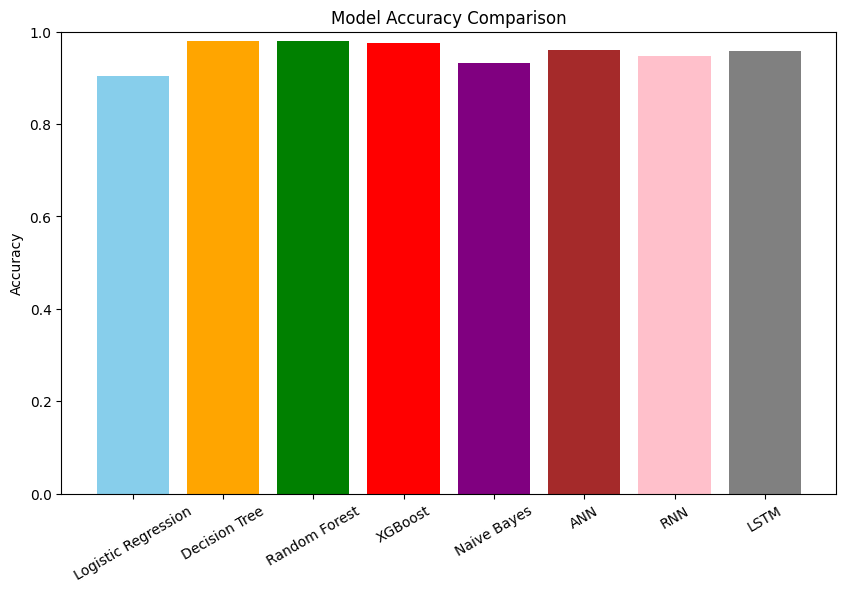

In [ ]:
# Visual accuracy comparison
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'Naive Bayes', 'ANN', 'RNN', 'LSTM']
accuracies = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_xgb, accuracy_nb, accuracy_ann, accuracy_rnn, accuracy_lstm]  # make sure all accuracy variables exist

# Optional: assign a color for each bar
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']

plt.figure(figsize=(10,6))
plt.bar(model_names, accuracies, color=colors)
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=30)  # Rotate x labels for better readability
plt.show()


Except for the logistic regression with a bit lower accuracy other models have similar accuracy

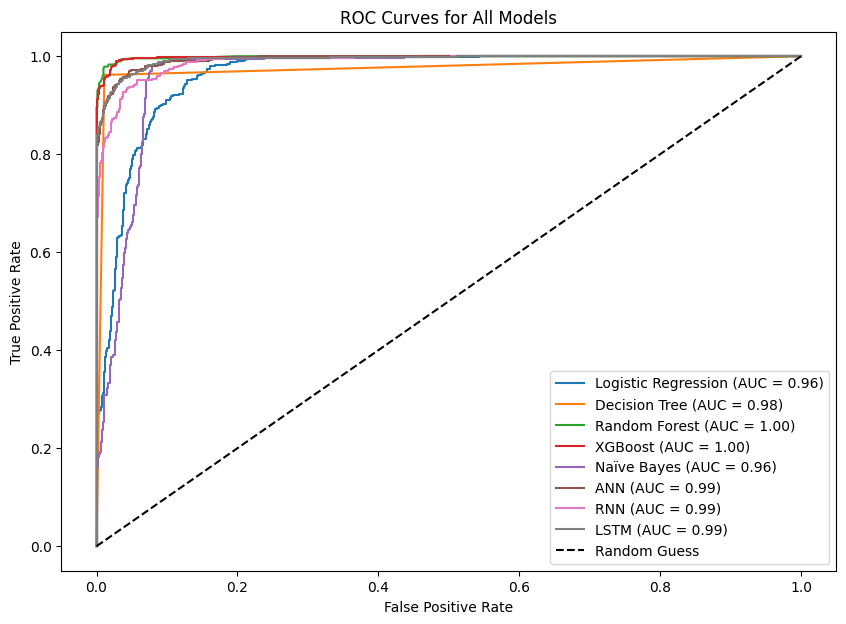

In [ ]:
from sklearn.metrics import roc_curve, auc

# Probabilities (for ML models: use predict_proba, for DL models already y_prob_XXX)
model_probs = {
    "Logistic Regression": lr.predict_proba(X_test_scaled)[:,1],
    "Decision Tree": dt.predict_proba(X_test_scaled)[:,1],
    "Random Forest": rf.predict_proba(X_test_scaled)[:,1],
    "XGBoost": xgb.predict_proba(X_test_scaled)[:,1],
    "Naïve Bayes": y_prob_nb,
    "ANN": y_prob_ann,
    "RNN": y_pred_rnn_prob,
    "LSTM": y_pred_lstm_prob
}

plt.figure(figsize=(10,7))

for name, prob in model_probs.items():
    fpr, tpr, _ = roc_curve(y_test, prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All Models")
plt.legend(loc='lower right')
plt.show()


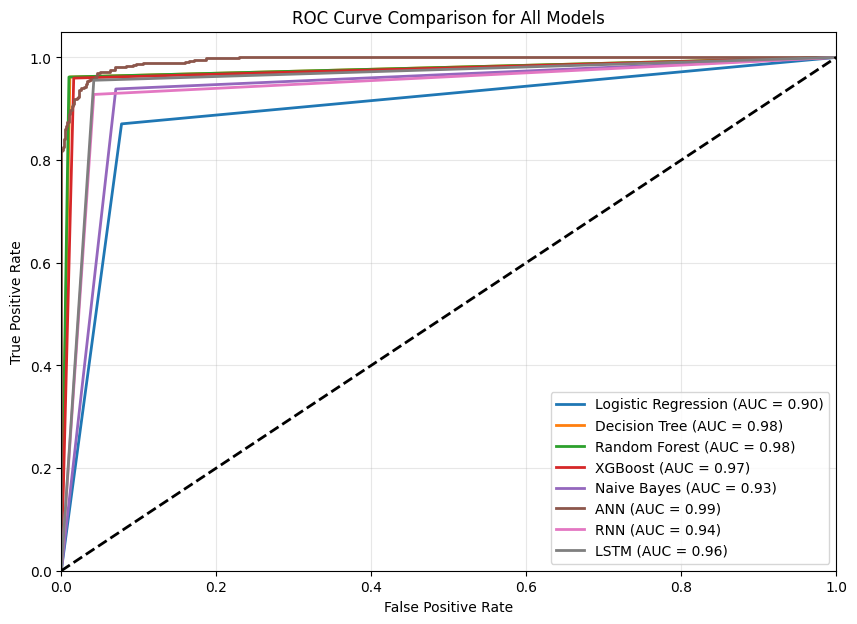

In [ ]:
# Visual comparison using ROC and AUC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Probabilities for models (using your variable names)
models = {
    "Logistic Regression": y_pred_lr,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb,
    "Naive Bayes": y_pred_nb,
    "ANN": y_prob_ann,
    "RNN": y_pred_rnn,
    "LSTM": y_pred_lstm
}

plt.figure(figsize=(10,7))

for name, y_prob in models.items():
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--', lw=2)  # random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison for All Models')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


All our models performed really good, each scoring over 0.90 AUC. This shows they can reliably tell apart positive and negative cases, making them strong and trustable for predicting new, unseen data.
with ANN RNN and LSTM having accuracy of 0.95 and over shows the capability of these models

In [ ]:
print("Conclusion:")
print("Based on accuracy, precision, recall, F1-score, and ROC-AUC comparisons:")
print("- Decision Tree, Random Forest, and XGBoost perform exceptionally well (>97% accuracy).")
print("- ANN, RNN, and LSTM also show strong performance (>94%), especially LSTM slightly better than RNN.")
print("- Logistic Regression is reliable (~90%), Naïve Bayes performs well (~93%) but slightly lower than tree-based models.")
print("- Random Forest and XGBoost offer a balance of interpretability and high accuracy, recommended for deployment.")


Conclusion:
Based on accuracy, precision, recall, F1-score, and ROC-AUC comparisons:
- Decision Tree, Random Forest, and XGBoost perform exceptionally well (>97% accuracy).
- ANN, RNN, and LSTM also show strong performance (>94%), especially LSTM slightly better than RNN.
- Logistic Regression is reliable (~90%), Naïve Bayes performs well (~93%) but slightly lower than tree-based models.
- Random Forest and XGBoost offer a balance of interpretability and high accuracy, recommended for deployment.
